In [1]:
# mengimport library yg tersedia di python
import numpy as np #data dalam bentuk array
import matplotlib.pyplot as plt #membuat grafik dan visualisasi data dalam bentuk grafik
%matplotlib inline
import cv2 #mengimpor gambar
import matplotlib.image as mpimg #untuk membaca, menulis, dan memanipulasi gambar dalam berbagai format
from skimage import data #menggunakan modul data yang disediakan oleh pustaka skimage

In [2]:
image = cv2.imread("gambar1.jpg",cv2.IMREAD_GRAYSCALE) #mengubah gambar menjadi abu abu

In [3]:
image_equalized = cv2.equalizeHist(image) #untuk menghasilkan citra yang disejajarkan histogramnya (histogram equalization) dari citra image menggunakan fungsi equalizeHist() dari modul cv2 (OpenCV


In [4]:
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8)) #untuk membuat objek CLAHE (Contrast Limited Adaptive Histogram Equalization) menggunakan fungsi createCLAHE() dari modul cv2 (OpenCV).

#Apply CLAHE to the original image
image_clahe = clahe.apply(image)


In [5]:
# Create an empty array to store the final output
image_cs = np.zeros((image.shape[0],image.shape[1]),dtype = 'uint8')

# Apply Min-Max Contrasting
min = np.min(image)
max = np.max(image)

for i in range(image.shape[0]): #melakukan iterasi (perulangan) pada range nilai dari 0 hingga jumlah baris (dimensi pertama) dari citra image
    for j in range(image.shape[1]):
        image_cs[i,j] = 255*(image[i,j]-min)/(max-min) #melakukan normalisasi kontras linier pada nilai piksel tertentu

In [6]:
copyCamera = image.copy().astype(float) #membuat salinan citra

m1,n1 = copyCamera.shape #mengambil dimensi (jumlah baris dan kolom) dari citra dan menyimpannya dalam variabel m1 dan n1.
output1 = np.empty([m1, n1])

for baris in range(0, m1-1): #melakukan iterasi (perulangan) pada range nilai dari 0 hingga m1-1 jumlah baris
    for kolom in range(0, n1-1): #melakukan iterasi (perulangan) pada range nilai dari 0 hingga m1-1 jumlah kolom
        a1 = baris
        b1 = kolom
        output1[a1, b1] = copyCamera[baris, kolom] * 1.9

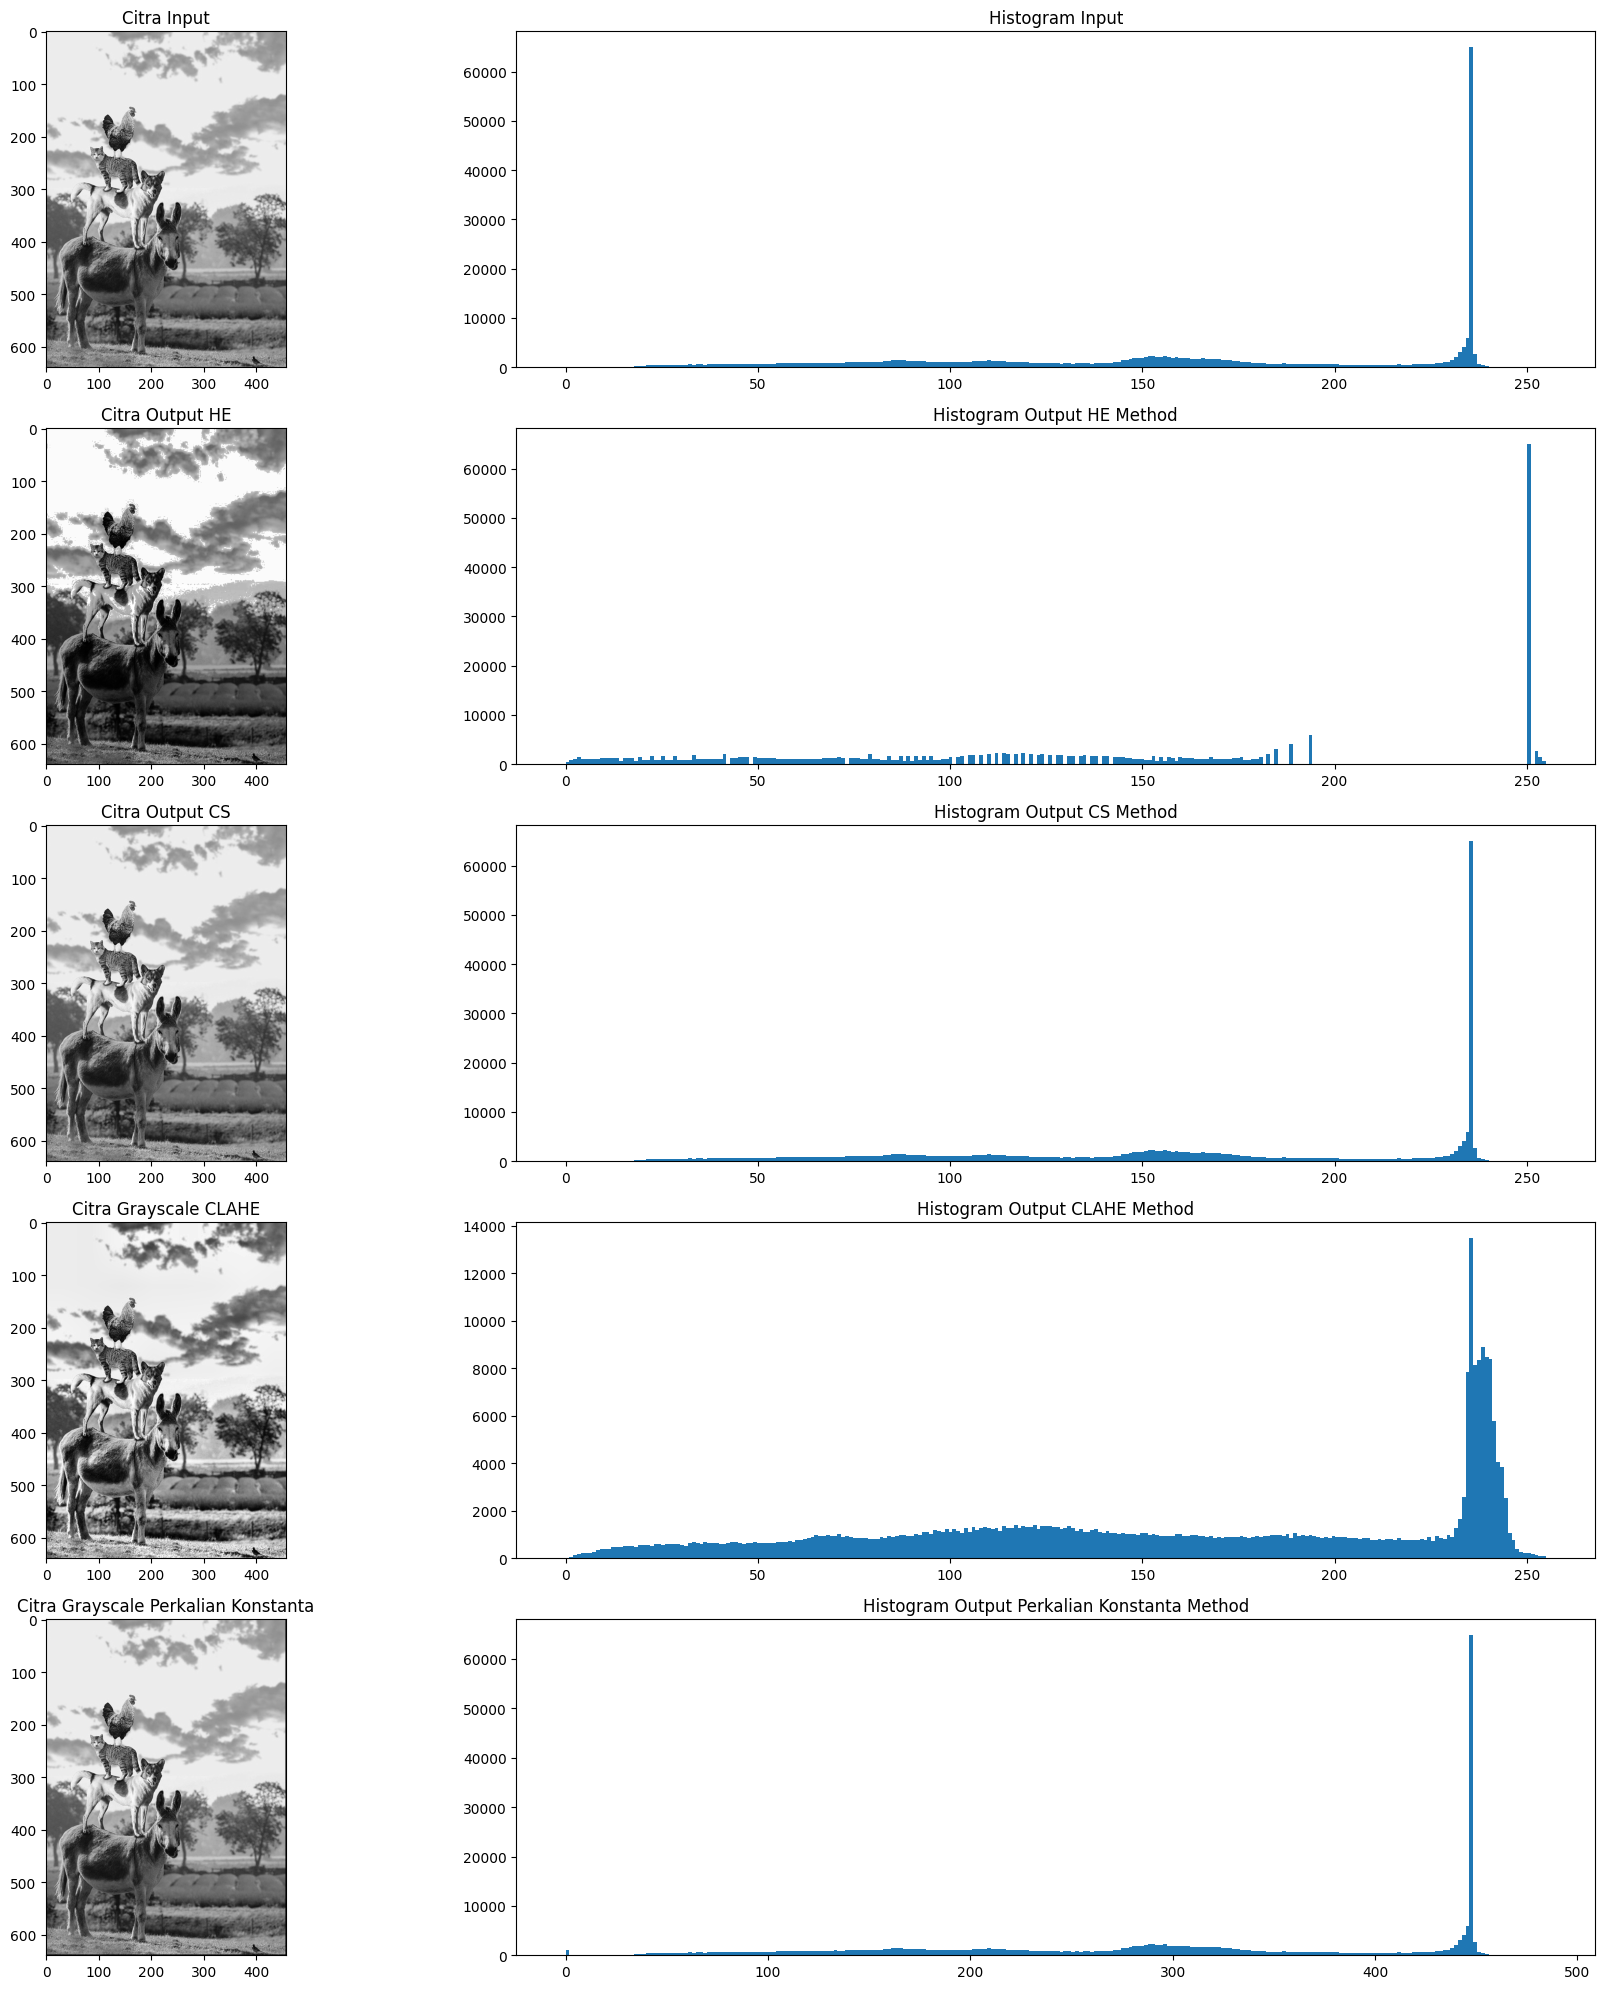

In [7]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20)) #membuat objek gambar (figure) dan objek sumbu (axes) dalam bentuk grid berukuran 5 baris dan 2 kolom dengan ukuran (dimensi) gambar sebesar 20x20 inci
ax = axes.ravel() # meratakan (flatten) objek array 
# Menampilkan citra input dan histogram input
ax[0].imshow(image, cmap=plt.cm.gray) #Gambar ditampilkan dalam skala abu-abu (grayscale) dengan menggunakan map pewarnaan (colormap) plt.cm.gray yang diberikan oleh pustaka Matplotlib
ax[0].set_title("Citra Input") #judul
ax[1].hist(image.ravel(), bins=256)#untuk membuat histogram dari gambar img dan menampilkannya pada sumbu (axis) indeks ke-1 dari objek axes
ax[1].set_title('Histogram Input') 

# Menampilkan citra output hasil equalisasi dan histogramnya
ax[2].imshow(image_equalized, cmap=plt.cm.gray)
ax[2].set_title("Citra Output HE")
ax[3].hist(image_equalized.ravel(), bins=256)
ax[3].set_title('Histogram Output HE Method')

# Menampilkan citra output hasil kontras stretching dan histogramnya
ax[4].imshow(image_cs, cmap=plt.cm.gray)
ax[4].set_title("Citra Output CS")
ax[5].hist(image_cs.ravel(), bins=256)
ax[5].set_title('Histogram Output CS Method')

# Menampilkan citra output hasil CLAHE dan histogramnya
ax[6].imshow(image_clahe, cmap=plt.cm.gray)
ax[6].set_title("Citra Grayscale CLAHE")
ax[7].hist(image_clahe.ravel(), bins=256)
ax[7].set_title('Histogram Output CLAHE Method')

# Menampilkan citra output hasil perkalian konstanta dan histogramnya
ax[8].imshow(output1, cmap=plt.cm.gray)
ax[8].set_title("Citra Grayscale Perkalian Konstanta")
ax[9].hist(output1.ravel(), bins=256)
ax[9].set_title('Histogram Output Perkalian Konstanta Method')

fig.tight_layout() #ntuk mengatur tata letak (layout) yang rapi dan padat pada objek gambar